## The 1.5 meter rule in football

#### Notebook to calculate number of occurences of players being closer than 1.5 meters from each other. Calculated for every second of the match.
Special thanks to Metrica Sports for providing the data and Friends of Tracking (especially Laurie Shaw) for providing the code base. 

In [ ]:
cd LaurieOnTracking

In [2]:
import Metrica_IO as mio
import Metrica_Viz as mviz
import Metrica_Velocities as mvel
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# set up initial path to data
DATADIR = '/PATH/TO/WHERE/YOU/SAVED/THE/SAMPLE/DATA'
game_id = 2 # let's look at sample match 2

# read in the event data
events = mio.read_event_data(DATADIR,game_id)

# read in tracking data
tracking_home = mio.tracking_data(DATADIR,game_id,'Home')
tracking_away = mio.tracking_data(DATADIR,game_id,'Away')

# Convert positions from metrica units to meters (note change in Metrica's coordinate system since the last lesson)
tracking_home = mio.to_metric_coordinates(tracking_home)
tracking_away = mio.to_metric_coordinates(tracking_away)
events = mio.to_metric_coordinates(events)

# reverse direction of play in the second half so that home team is always attacking from right->left
tracking_home,tracking_away,events = mio.to_single_playing_direction(tracking_home,tracking_away,events)

Reading team: home
Reading team: away


In [3]:
df_tracking = pd.concat([tracking_home,tracking_away], axis=1, sort=False)
df_tracking = df_tracking.loc[:,~df_tracking.columns.duplicated()]
df_tracking = df_tracking.drop(columns=['Period', 'Time [s]', 'ball_x','ball_y'])
df_tracking.columns

Index(['Home_11_x', 'Home_11_y', 'Home_1_x', 'Home_1_y', 'Home_2_x',
       'Home_2_y', 'Home_3_x', 'Home_3_y', 'Home_4_x', 'Home_4_y', 'Home_5_x',
       'Home_5_y', 'Home_6_x', 'Home_6_y', 'Home_7_x', 'Home_7_y', 'Home_8_x',
       'Home_8_y', 'Home_9_x', 'Home_9_y', 'Home_10_x', 'Home_10_y',
       'Home_12_x', 'Home_12_y', 'Home_13_x', 'Home_13_y', 'Home_14_x',
       'Home_14_y', 'Away_25_x', 'Away_25_y', 'Away_15_x', 'Away_15_y',
       'Away_16_x', 'Away_16_y', 'Away_17_x', 'Away_17_y', 'Away_18_x',
       'Away_18_y', 'Away_19_x', 'Away_19_y', 'Away_20_x', 'Away_20_y',
       'Away_21_x', 'Away_21_y', 'Away_22_x', 'Away_22_y', 'Away_23_x',
       'Away_23_y', 'Away_24_x', 'Away_24_y', 'Away_26_x', 'Away_26_y'],
      dtype='object')

In [4]:
from tqdm.notebook import tqdm
from scipy.spatial import distance
df = df_tracking
number_of_connections = 0
max_connections_in_a_single_frame = 0
index_max_connections = 0
for index, row in tqdm(df.iterrows(), total = len(df)):
    # Delete the players (substitutes) with nan values: 
    row = row.dropna()
    if ((index/25) % 2) == 1: # Loop through all the data and calculate for every second. (25 fps)
            list_of_connections = []
            for i in range(0, len(row),2):
                list_of_other_players = list(range(0, len(row),2))
                for connection in list_of_connections:
                    #Deletes players from list, that already established a connection with this player.
                    if connection[0] == i:
                        list_of_other_players.remove(connection[1])     
                for i2 in list_of_other_players:
                    temp_distance_nodes = abs(distance.euclidean((row[int(i/2)],row[(int(i/2))+1]), (row[int(i2/2)],row[int((i2/2))+1]) ))
                    if (temp_distance_nodes < 1.5) & (not(i==i2)):
                        list_of_connections.append([i2,i]) 
                #For fun: Maximum number of connections at 1 moment:
                if len(list_of_connections) > max_connections_in_a_single_frame:
                    max_connections_in_a_single_frame = len(list_of_connections)
                    index_max_connections = index
            number_of_connections += len(list_of_connections)              
            
print('Total number of connections during the game: ' + str(number_of_connections)) 
print('Max number of connections at a single moment: ' + str(max_connections_in_a_single_frame))  


Total number of connections during the game: 2612
Max number of connections at a single moment: 21


(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1f1d8b11c08>)

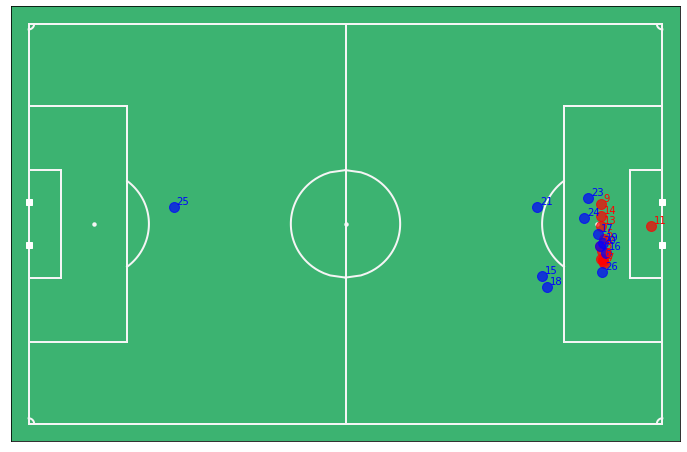

In [5]:
#Plot frame in which there are the most connections (less than 1.5 meters)
mviz.plot_frame( tracking_home.loc[index_max_connections], tracking_away.loc[index_max_connections],  annotate=True)